In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [0]:
%pip install openpyxl

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
dbutils.fs.ls('/FileStore/shared_uploads/choudharynarendra1361s@gmail.com/')

Out[1]: [FileInfo(path='dbfs:/FileStore/shared_uploads/choudharynarendra1361s@gmail.com/a1_FlightFare_Dataset.xlsx', name='a1_FlightFare_Dataset.xlsx', size=498199, modificationTime=1732870469000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/choudharynarendra1361s@gmail.com/a2_Unseen_Dataset-1.xlsx', name='a2_Unseen_Dataset-1.xlsx', size=42448, modificationTime=1732898260000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/choudharynarendra1361s@gmail.com/a2_Unseen_Dataset-2.xlsx', name='a2_Unseen_Dataset-2.xlsx', size=42448, modificationTime=1732898684000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/choudharynarendra1361s@gmail.com/a2_Unseen_Dataset.xlsx', name='a2_Unseen_Dataset.xlsx', size=42448, modificationTime=1732870823000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/choudharynarendra1361s@gmail.com/airport.csv', name='airport.csv', size=84548, modificationTime=1732602974000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/choudharynarendra1361s@gmail.com/book-1.txt',

In [0]:
# Copy the file to a local path for Pandas
dbutils.fs.cp(
    "dbfs:/FileStore/shared_uploads/choudharynarendra1361s@gmail.com/a1_FlightFare_Dataset.xlsx",
    "file:/tmp/a1_FlightFare_Dataset.xlsx"
)


Out[2]: True

In [0]:
# Read the file using Spark to verify it exists
spark.read.format("binaryFile").load("dbfs:/FileStore/shared_uploads/choudharynarendra1361s@gmail.com/a1_FlightFare_Dataset.xlsx").show()


+--------------------+-------------------+------+--------------------+
|                path|   modificationTime|length|             content|
+--------------------+-------------------+------+--------------------+
|dbfs:/FileStore/s...|2024-11-29 08:54:29|498199|[50 4B 03 04 14 0...|
+--------------------+-------------------+------+--------------------+



In [0]:
import pandas as pd
# Local file path
local_path = "/tmp/a1_FlightFare_Dataset.xlsx"
dataset = pd.read_excel(local_path)
pd.set_option('display.max_columns', None)

dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10001 non-null  object 
 1   Date_of_Journey  10001 non-null  object 
 2   Source           10001 non-null  object 
 3   Destination      10001 non-null  object 
 4   Route            10000 non-null  object 
 5   Dep_Time         10001 non-null  object 
 6   Arrival_Time     10001 non-null  object 
 7   Duration         10001 non-null  object 
 8   Total_Stops      10000 non-null  object 
 9   Additional_Info  10001 non-null  object 
 10  Price            10001 non-null  float64
dtypes: float64(1), object(10)
memory usage: 859.6+ KB


In [0]:
dataset.dropna(inplace=True)
dataset.isnull().sum()


Out[6]: Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [0]:
dataset["journey_day"] = pd.to_datetime(dataset.Date_of_Journey,format='%d/%m/%Y').dt.day
dataset["journey_month"] = pd.to_datetime(dataset.Date_of_Journey,format='%d/%m/%Y').dt.month
dataset["Additional_Info"].value_counts()

Out[7]: No info                         7824
In-flight meal not included     1844
No check-in baggage included     299
1 Long layover                    19
Change airports                    6
No Info                            3
Business class                     3
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [0]:
#droping column of no further use
dataset.drop(["Date_of_Journey","Route","Additional_Info"],axis = 1,inplace = True)
dataset.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897.0,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662.0,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882.0,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218.0,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302.0,1,3


In [0]:
dataset.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897.0,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662.0,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882.0,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218.0,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302.0,1,3


In [0]:
# def helper(total_stops):
#     if isinstance(total_stops, int):
#         return total_stops
#     if total_stops == 'non-stop':
#         return 0
#     else:
#         return int(total_stops.split()[0])
# dataset["Total_Stops"] = dataset["Total_Stops"].apply(helper)
#found a simpler way 
dataset["Total_Stops"].value_counts()
dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
dataset.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897.0,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662.0,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882.0,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218.0,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302.0,1,3


In [0]:
#depature and arrival time
dataset["dep_hour"] = pd.to_datetime(dataset.Dep_Time).dt.hour
dataset["dep_min"] = pd.to_datetime(dataset.Dep_Time).dt.minute
dataset["arrival_hour"] = pd.to_datetime(dataset.Arrival_Time).dt.hour
dataset["arrival_min"] = pd.to_datetime(dataset.Arrival_Time).dt.minute
dataset.drop(['Dep_Time','Arrival_Time'],axis= 1,inplace=True)
dataset.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882.0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302.0,1,3,16,50,21,35


In [0]:
#duration
duration = list(dataset["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i].strip()
duration_hrs = []
duration_mins = []
for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
dataset['Duration_hours'] = duration_hrs
dataset['Duration_mins'] = duration_mins
dataset.drop(['Duration'],axis=1,inplace=True)
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302.0,1,3,16,50,21,35,4,45


In [0]:
#airlines
dataset["Airline"].value_counts()

Out[13]: Jet Airways                          3598
IndiGo                               1927
Air India                            1633
Multiple carriers                    1129
SpiceJet                              769
Vistara                               447
Air Asia                              296
GoAir                                 179
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [0]:
#airline
Airline = dataset[["Airline"]].copy()
Current_Airline_List = Airline['Airline']
New_Airline_List = []

for airline in Current_Airline_List:
    if airline in ['Jet Airways', 'IndiGo', 'Air India', 'SpiceJet','Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
        New_Airline_List.append(airline)
    else:
        New_Airline_List.append('Other')
Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline['Airline'].value_counts()

Out[14]: Jet Airways          3598
IndiGo               1927
Air India            1632
Multiple carriers    1129
SpiceJet              769
Vistara               447
Air Asia              296
GoAir                 179
Other                  22
Name: Airline, dtype: int64

In [0]:
Airline = pd.get_dummies(Airline)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [0]:
dataset["Source"].value_counts()

Out[16]: Delhi       4257
Kolkata     2678
Banglore    2058
Mumbai       647
Chennai      360
Name: Source, dtype: int64

In [0]:
#source
Source = dataset[['Source']]
Source = pd.get_dummies(Source)
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [0]:
dataset["Destination"].value_counts()

Out[18]: Cochin       4257
Banglore     2678
Delhi        1191
New Delhi     867
Hyderabad     647
Kolkata       360
Name: Destination, dtype: int64

In [0]:
#destination
Destination = dataset[["Destination"]].copy()
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
    if value in ['New Delhi']:
        New_Destination_List.append('Delhi')
    else:
        New_Destination_List.append(value)
Destination['Destination'] = pd.DataFrame(New_Destination_List)
Destination = pd.get_dummies(Destination)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,0,1,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [0]:
#concat
data_train = pd.concat([dataset,Airline,Source,Destination], axis=1 )
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897.0,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,2,13882.0,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,6218.0,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,1,13302.0,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [0]:
data_train.shape

Out[21]: (10000, 29)

In [0]:
data_train.columns

Out[22]: Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Airline_Other', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Banglore',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [0]:
X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata']]
y = data_train.iloc[:, 1]

In [0]:
print(X.shape, y.shape)

(10000, 27) (10000,)


In [0]:
#imp features
from sklearn.ensemble import ExtraTreesRegressor
selection =ExtraTreesRegressor()
selection.fit(X,y)
print(selection.feature_importances_)


[0.24123758 0.14078983 0.06130662 0.02844854 0.02364922 0.03547386
 0.02297214 0.13967955 0.0200213  0.00857658 0.00133273 0.01355957
 0.11399111 0.01639797 0.02543746 0.00414375 0.00326475 0.0269395
 0.00095577 0.01968853 0.00686384 0.01476889 0.00373315 0.00643397
 0.01499516 0.00371942 0.00161919]


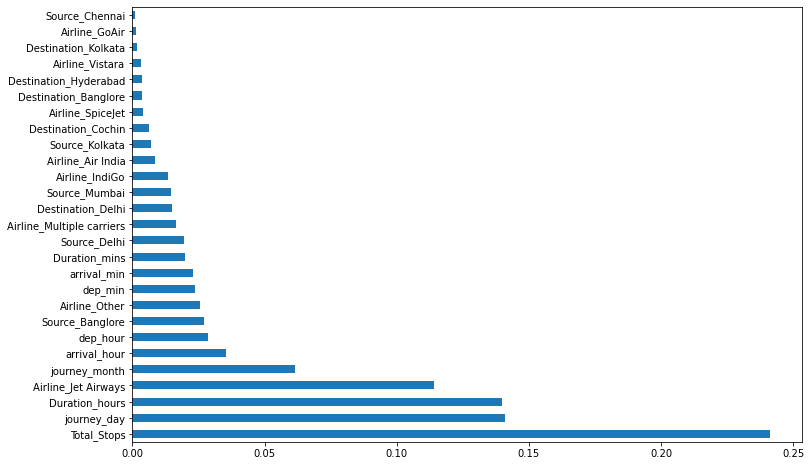

In [0]:
#plotiing
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
feat_importance = pd.Series(selection.feature_importances_,index=X.columns)
feat_importance.nlargest(27).plot(kind='barh')
plt.show()

In [0]:
#check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(data):
    vif = pd.DataFrame()
    vif['Variables'] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values,i) for i in range (data.shape[1])]
    return vif
cal_vif(X)

,Variables,VIF
0,Total_Stops,3.022364
1,journey_day,1.021296
2,journey_month,1.105632
3,dep_hour,1.056345
4,dep_min,1.090589
5,arrival_hour,1.074826
6,arrival_min,1.127890
7,Duration_hours,2.518524
8,Duration_mins,1.138308
9,Airline_Air India,6.021425


There is **Severe** Multicollinearity in **Source** and **Destination** Variables.

Hence dropping one column per set of one-hot encoded variables (Source and Destination) to reduce redundancy.
Dropping Source_Banglore and Destination_Banglore.


In [0]:
X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
y = data_train.iloc[:, 1]
cal_vif(X)

,Variables,VIF
0,Total_Stops,7.533035
1,journey_day,3.511805
2,journey_month,16.470796
3,dep_hour,5.790951
4,dep_min,2.804206
5,arrival_hour,4.923106
6,arrival_min,3.455823
7,Duration_hours,6.183394
8,Duration_mins,4.106901
9,Airline_Air India,5.381726


Again High VIF for
journey_month (16.47)
Source_Delhi (16.51)
Airline_Jet Airways (10.19)
Destination_Cochin (13.43)
Therefore Dropping Source_Delhi

In [0]:
# # Drop 'Source_Delhi'
# X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
#        'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
#        'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
#        'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
#        'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai',
#        'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
#        'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
# cal_vif(X)

,Variables,VIF
0,Total_Stops,7.066192
1,journey_day,3.460860
2,journey_month,15.002639
3,dep_hour,5.762068
4,dep_min,2.803870
5,arrival_hour,4.901456
6,arrival_min,3.454707
7,Duration_hours,6.178091
8,Duration_mins,4.106244
9,Airline_Air India,5.294051


In [0]:
# # Drop 'Destination_Cochin'
# X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
#        'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
#        'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
#        'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
#        'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai',
#        'Source_Kolkata', 'Source_Mumbai',
#        'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
# cal_vif(X)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
from sklearn.ensemble import RandomForestRegressor
randomForest_regressor = RandomForestRegressor()
randomForest_regressor.fit(X_train,y_train)

Out[35]: RandomForestRegressor()

In [0]:
print('Model Performance on Training Set:', round(randomForest_regressor.score(X_train, y_train)*100,2))
print('Model Performance on Test Set:', round(randomForest_regressor.score(X_test, y_test)*100,2))

Model Performance on Training Set: 95.37
Model Performance on Test Set: 82.5


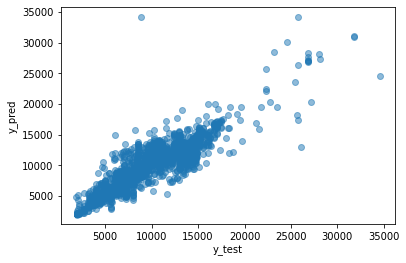

In [0]:
y_pred = randomForest_regressor.predict(X_test)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [0]:
#Error Metrics
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1175.0533154960735
MSE: 3475730.8732621786
RMSE: 1864.3312134012504


In [0]:
#RMSE = sqrt((PV-OV)^2/n)
#RMSE/(max(DV)-min(DV))
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

Normalized RMSE  0.06
Max Value:  79512.0 
Min Value:  1759.0


In [0]:
import pickle

# Saving the random forest regressor model
with open('c2_flight_rf.pkl', 'wb') as file:
    pickle.dump(randomForest_regressor, file)

print("Model saved successfully!")

Model saved successfully!


Testing on unseen Data

In [0]:
# Loading the model
with open('c2_flight_rf.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [0]:
# Copy the file to a local path for Pandas
dbutils.fs.cp(
    "dbfs:/FileStore/shared_uploads/choudharynarendra1361s@gmail.com/a2_Unseen_Dataset.xlsx",
    "file:/tmp/a2_FlightFare_Dataset.xlsx"
)


Out[83]: True

In [0]:
import pandas as pd
# Local file path
local_path_new = "/tmp/a2_FlightFare_Dataset.xlsx"
unseen_dataset = pd.read_excel(local_path_new)
pd.set_option('display.max_columns', None)

unseen_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,12898.0
1,IndiGo,6/03/2019,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851.0
2,Air India,21/03/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,5704.0
3,Vistara,18/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 16 Mar,2h 55m,non-stop,No info,11598.0
4,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,9149.0


In [0]:
#feature engineering on unseen data
# Feature Engineering on: 'Date_of_Journey'
unseen_dataset["journey_day"] = pd.to_datetime(unseen_dataset.Date_of_Journey, format="%d/%m/%Y").dt.day
unseen_dataset["journey_month"] = pd.to_datetime(unseen_dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.month
unseen_dataset.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Feature Engineering on: 'Dep_Time'
unseen_dataset["dep_hour"] = pd.to_datetime(unseen_dataset["Dep_Time"]).dt.hour
unseen_dataset["dep_min"] = pd.to_datetime(unseen_dataset["Dep_Time"]).dt.minute
unseen_dataset.drop(["Dep_Time"], axis = 1, inplace = True)

# Feature Engineering on: 'Arrival_Time'
unseen_dataset["arrival_hour"] = pd.to_datetime(unseen_dataset["Arrival_Time"]).dt.hour
unseen_dataset["arrival_min"] = pd.to_datetime(unseen_dataset["Arrival_Time"]).dt.minute
unseen_dataset.drop(["Arrival_Time"], axis = 1, inplace = True)

# Feature Engineering on: 'Duration'
duration = list(unseen_dataset["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
unseen_dataset["Duration_hours"] = duration_hours
unseen_dataset["Duration_mins"] = duration_mins
unseen_dataset.drop(["Duration"], axis = 1, inplace = True)


# Perform feature engineering on Categorical dt variables
# Feature Engineering on: 'Airline'
Airline = unseen_dataset[["Airline"]].copy()
New_Airline_List = []
Current_Airline_List = Airline['Airline']
for carrier in Current_Airline_List:
  if carrier in ['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
    New_Airline_List.append(carrier)
  else:
    New_Airline_List.append('Other')
Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline = pd.get_dummies(Airline, drop_first= True)

# Feature Engineering on: 'Source'
Source = unseen_dataset[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

# Feature Engineering on: 'Destination'
Destination = unseen_dataset[["Destination"]].copy()
Current_Destination_List = Destination['Destination']
New_Destination_List = []
for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)
Destination['Destination'] = pd.DataFrame(New_Destination_List)
Destination['Destination'].value_counts()
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

# Feature Engineering on: 'Route', 'Additional_Info
unseen_dataset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Feature Engineering on: 'Total_Stops'
unseen_dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> train_data + Airline + Source + Destination
data_test = pd.concat([unseen_dataset, Airline, Source, Destination], axis = 1)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

# See how the test dataset looks
data_test.head()


,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,12898.0,27,5,7,5,19,0,11,55,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,1,10851.0,6,3,2,5,7,25,5,20,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1,5704.0,21,3,9,45,23,0,13,15,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,11598.0,18,3,21,10,0,5,2,55,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,9149.0,27,5,8,30,19,15,10,45,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [0]:
#dropping Source_Delhi
#testing with droping Destination_Cochin
X_unseen = data_test.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
y_unseen = data_test.iloc[:, 1]

In [0]:
y_pred = randomForest_regressor.predict(X_unseen)

In [0]:
print('R2 value: ', round(metrics.r2_score(y_unseen, y_pred),2))
print('Normalized RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_unseen, y_pred))/(max(y_unseen)-min(y_unseen)),2))
print('Max Value: ', max(y_unseen), '\nMin Value: ', min(y_unseen))

R2 value:  0.65
Normalized RMSE:  0.05
Max Value:  57209.0 
Min Value:  1759.0


In [0]:
df_y_pred = pd.DataFrame(y_pred,columns= ['Predicted Price'])
original_dataset = pd.read_excel(local_path_new)
dfx = pd.concat([original_dataset, df_y_pred], axis=1)
dfx.to_excel("c2_ModelOutput.xlsx")
dfx.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Predicted Price
0,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,12898.0,15231.397500
1,IndiGo,6/03/2019,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851.0,11477.060000
2,Air India,21/03/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,5704.0,6556.993333
3,Vistara,18/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 16 Mar,2h 55m,non-stop,No info,11598.0,6189.440833
4,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,9149.0,9167.934929


In [0]:
#Hyper Parameter Tunning
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [0]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [0]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = randomForest_regressor, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = 1)

In [0]:
# Model Training with Hyperparameter Tuning
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

In [0]:
rf_random.best_params_

Out[102]: {'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

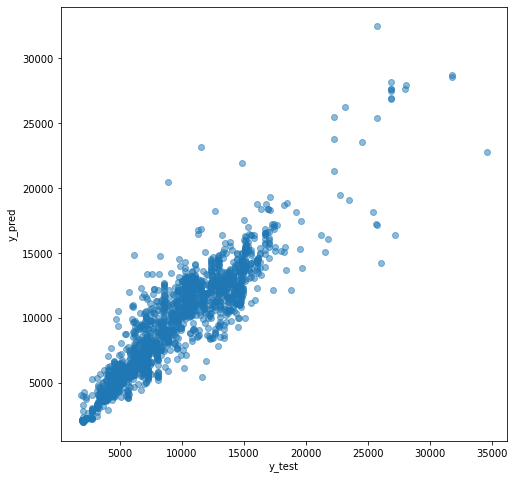

In [0]:
# Plot Performance Chart
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [0]:
prediction = rf_random.predict(X_test)

In [0]:
# RMSE/(max(DV)-min(DV))
print('R2 value: ', round(metrics.r2_score(y_test, prediction),2))
print('RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_test, prediction)),2))
print('Normalized RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_test, prediction))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y_test), '\nMin Value: ', min(y_test))

R2 value:  0.84
RMSE:  1768.91
Normalized RMSE:  0.05
Max Value:  34608.0 
Min Value:  1840.0


In [0]:
print('Model Performance on Training Set:', round(randomForest_regressor.score(X_train, y_train)*100,2))
print('Model Performance on Test Set:', round(randomForest_regressor.score(X_test, y_test)*100,2))